# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [5]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD?format=json" #added json format
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD?format=json"

In [8]:
# Fetch current BTC price
btc_price_request = requests.get(btc_url)
btc_json = btc_price_request.json()
btc_price = btc_json["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price_request = requests.get(eth_url)
eth_json = eth_price_request.json()
eth_price = eth_json["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $38620.80
The current value of your 5.3 ETH is $7061.45


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
api_key = os.getenv("ALPACA_API_KEY")
api_secret = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    api_key,
    api_secret,
    api_version="v2"
)

In [11]:
# Format current date as ISO format
today = pd.Timestamp("2021-01-26", tz="America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
2021-01-26 00:00:00-05:00  117.46  117.585  117.4255  117.51  3451493  385.41   

                                                             
                             high     low   close    volume  
2021-01-26 00:00:00-05:00  385.85  383.54  383.83  36871235

In [12]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].item()
spy_close_price = df_portfolio["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.51
Current SPY closing price: $383.83


In [13]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19191.50
The current value of your 200 AGG shares is $23502.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
data = [["crypto",my_btc_value+my_eth_value],["shares",my_spy_value+my_agg_value]]
df_savings = pd.DataFrame(
    data = data,
    columns = ["Asset","Amount"],
).set_index("Asset")

# Display savings DataFrame
display(df_savings)

,Amount
Asset,
crypto,45682.255
shares,42693.500


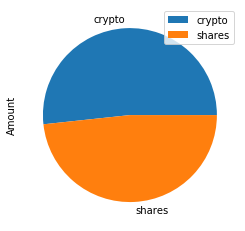

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount")

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_spy_value + my_agg_value + my_btc_value + my_eth_value

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your savings with a total value of ${round(total_savings,2)}.")
elif total_savings == emergency_fund:
    print(f"Congratulations! You have met your emergency fund goal of ${emergency_fund}.")
else:
    print(f"You are {round(emergency_fund-total_savings,2)} away from your savings goal.")

Congratulations! You have enough money in your savings with a total value of $88375.75.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [53]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-26', tz='America/Chicago').isoformat()
end_date = pd.Timestamp('2021-01-26', tz='America/Chicago').isoformat()

In [54]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827   
2016-02-01 00:00:00-05:00  109.10  109.2500  108.8415  108.97  4186126   

                              SPY                                     
                             open    high     low   close     volume  
2016-01-26 00:00:00-05:00  188.42  190.53  188.02  190.18  115312517  
2016-01-27 00:00:00-05:00  189.58  191.56  187.06  188.12  157060622  
2016-01-28 00:00:00-05:00  189.96  190.20  187.16  189.14  118949268  
2016-01-29 00:00:00-05:00  190.02  193.75  189.88  193.69  145410523  
2016-02-01 00:00:00-05:00  192.53  194.58  191.84  193.69   98369142

In [55]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [56]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827   
2016-02-01 00:00:00-05:00  109.10  109.2500  108.8415  108.97  4186126   

                                           SPY                          \
                          daily_return    open    high     low   close   
2016-01-26 00:00:00-05:00          NaN  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   
2016-01-28 00:00:00-05:00     0.000826  189.96  190.20  187.16  189.14   
2016-01-29 00:00:00-05:00     0.002568  190.02  193.75  189.88  193.69   
2016-02-01 00:00:00-05:00    -0.003202  192.53  194.58  191.84  193.69   

                                                   
                              volume daily_return  
2016-01-26 00:00:00-05:00  115312517          NaN  
2016-01-27 00:00:00-05:00  157060622    -0.010832  
2016-01-28 00:00:00-05:00  118949268     0.005422  
2016-01-29 00:00:00-05:00  145410523     0.024056  
2016-02-01 00:00:00-05:00   98369142     0.000000

In [57]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991485,1.003895,0.995244,1.009186,1.008764,1.003532,0.989988,1.009314,0.994655,1.003446,...,0.988253,1.004909,1.007051,1.002781,1.006077,0.994708,0.978379,1.010750,0.996616,0.998517
2,0.991257,1.004199,0.998229,1.013542,1.020867,1.010636,0.985292,1.021307,0.989209,0.990169,...,0.983367,1.004758,1.006091,1.001864,1.013226,1.001781,0.972738,1.003665,0.984211,0.988568
3,0.984174,1.018871,0.994544,1.005566,1.016982,1.011918,0.977818,1.023885,0.977417,0.983105,...,0.990976,0.991616,1.002585,0.984758,1.010584,1.001742,0.977596,1.005776,0.983616,0.998437
4,0.981627,1.020106,1.002633,1.000547,1.004318,1.006221,0.978805,1.023966,0.990893,0.977257,...,1.004754,0.990612,1.003782,0.984942,1.011816,1.001411,0.976163,1.011443,0.977213,1.004145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.139413,20.233272,11.775855,10.808593,18.374881,23.507486,14.263248,26.865947,4.480836,21.933785,...,25.099100,13.036596,32.851706,76.503908,14.025546,15.497039,8.645994,21.448441,13.296964,25.709277
7557,9.123310,20.250838,11.849812,10.783078,18.386945,23.390078,14.218075,27.186599,4.502295,21.907527,...,24.917546,12.949737,33.009817,77.510797,14.053515,15.626571,8.429946,21.541740,13.352176,25.504578
7558,9.106276,20.281473,11.863047,10.793082,18.200076,23.074868,14.343600,27.005200,4.504801,21.664004,...,24.799724,12.891704,33.289722,78.728366,14.109730,15.543517,8.378640,21.553501,13.364224,25.447022
7559,9.205540,20.303499,11.881219,10.889682,18.162771,23.137683,14.299195,26.859624,4.518941,21.774393,...,24.855284,12.895630,33.276382,79.015781,14.235791,15.426720,8.305072,21.656857,13.434086,25.194347


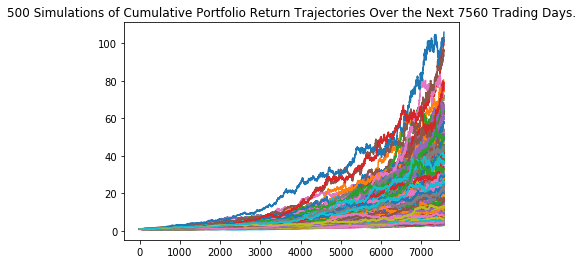

In [58]:
# Plot simulation outcomes
MC_30year.plot_simulation()

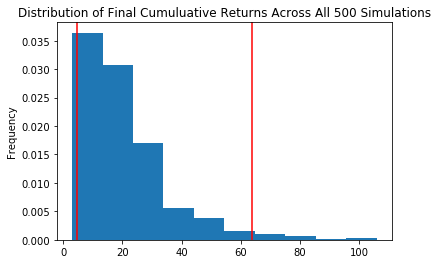

In [60]:
# Plot probability distribution and confidence intervals
MC_30year.plot_distribution()

### Retirement Analysis

In [61]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean             20.877038
std              15.181163
min               3.014926
25%              10.645510
50%              16.580679
75%              25.749587
max             105.770020
95% CI Lower      4.650243
95% CI Upper     63.615502
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [62]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $93004.86 and $1272310.03


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [63]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_2 = round(summary_stats[8]*initial_investment_2,2)
ci_upper_2 = round(summary_stats[9]*initial_investment_2,2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_2} and ${ci_upper_2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $139507.28 and $1908465.05


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [64]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.30,0.70], # changed weights to 30% bonds, 70% stocks
    num_simulation = 500,
    num_trading_days = 252*5
)

In [65]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004726,1.002974,0.977242,0.991044,0.984664,0.999606,1.006403,1.010468,1.000978,1.003653,...,0.996389,0.999229,0.999186,0.989887,1.005946,0.996856,0.983392,1.010536,1.011646,0.988339
2,1.007346,0.991416,0.974276,0.986618,0.979382,1.001070,1.009674,1.011975,1.000787,1.003201,...,0.990877,1.010900,1.008293,0.988402,1.020644,1.006741,0.991628,1.006358,1.013388,0.999070
3,0.992039,0.993711,0.964247,0.988348,0.977154,1.009404,1.027173,1.003350,0.994472,1.004534,...,0.989543,1.012582,1.005016,1.001857,1.033925,1.010987,0.989628,0.999367,1.016716,1.002570
4,0.999107,0.979376,0.965283,0.980179,0.970983,1.031918,1.031832,1.010705,1.000242,1.003806,...,0.994228,1.020604,0.996938,1.016578,1.030094,1.011168,0.989608,0.981854,1.021292,1.001888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.939173,2.486153,1.797555,0.801728,1.649483,2.190286,1.289881,1.997613,1.774438,2.258736,...,0.972609,1.516438,1.632296,1.274283,1.740776,1.433478,2.192540,1.823826,2.329592,2.526266
1257,0.931966,2.489697,1.811127,0.799905,1.668619,2.194489,1.297023,1.957581,1.761611,2.268474,...,0.967138,1.514561,1.616652,1.293915,1.737062,1.442664,2.203904,1.843932,2.320828,2.555629
1258,0.926794,2.520379,1.839076,0.799951,1.653176,2.199891,1.303357,1.981700,1.753628,2.260491,...,0.981793,1.496487,1.590296,1.308683,1.714974,1.459647,2.198483,1.841207,2.340010,2.567301
1259,0.927986,2.513445,1.836655,0.797338,1.679219,2.233345,1.321705,1.991197,1.761898,2.247972,...,0.977881,1.501651,1.587580,1.305359,1.717219,1.476454,2.196560,1.840937,2.376843,2.568146


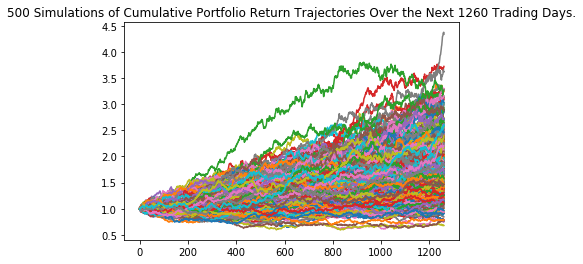

In [66]:
# Plot simulation outcomes
MC_5year.plot_simulation()

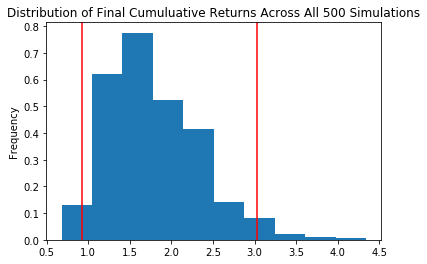

In [67]:
# Plot probability distribution and confidence intervals
MC_5year.plot_distribution()

In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_5year = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_5year)

count           500.000000
mean              1.778762
std               0.547832
min               0.678948
25%               1.380201
50%               1.693498
75%               2.134292
max               4.340197
95% CI Lower      0.919551
95% CI Upper      3.033750
Name: 1260, dtype: float64


In [69]:
# Set initial investment
initial_investment_3 = 35000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_3 = round(summary_statistics_5year[8]*initial_investment_3,2)
ci_upper_3 = round(summary_statistics_5year[9]*initial_investment_3,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_3} and ${ci_upper_3}")

There is a 95% chance that an initial investment of $35000 in the portfolio over the next 5 years will end within in the range of $32184.29 and $106181.26


### Ten Years Retirement Option

In [70]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.20,0.80], # changed weights to 20% bonds, 80% stocks
    num_simulation = 500,
    num_trading_days = 252*10
)

In [71]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998103,0.992338,1.002337,1.002363,1.013215,1.012847,0.989326,1.007129,0.985144,1.012354,...,0.989838,1.001188,1.004346,0.990346,0.989377,1.004499,1.010098,1.004018,0.992948,0.997172
2,0.993592,0.991171,1.005488,1.014176,1.015265,1.004729,0.992756,1.005464,0.985236,1.013074,...,0.995184,1.002951,1.009293,0.992002,0.985760,0.997052,1.009420,0.990013,0.983498,1.001003
3,0.997633,0.976337,1.006015,0.998980,1.008888,0.998563,1.003793,1.016663,0.970919,1.012855,...,0.992328,0.992350,1.026695,1.004894,0.978390,0.994122,1.018314,0.996626,0.989929,1.000073
4,1.008509,0.986402,1.001063,1.001652,1.014996,1.007802,1.008159,1.020165,0.970275,1.004934,...,0.996849,0.979327,1.028950,1.005583,0.981257,0.994157,1.010134,1.002923,0.987163,1.005220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.421477,9.436290,4.691560,2.691144,2.474711,2.652523,5.632714,3.044911,2.391929,3.289260,...,5.076342,2.786348,2.256277,3.505646,4.160743,1.576830,5.088278,1.844968,2.127267,3.251437
2517,2.398108,9.491095,4.689182,2.712686,2.444664,2.684039,5.656219,3.049503,2.410837,3.257205,...,5.128887,2.751960,2.279928,3.494257,4.114182,1.572617,5.112942,1.835922,2.162182,3.272571
2518,2.397922,9.429699,4.725550,2.750645,2.445390,2.677937,5.638288,3.073426,2.455653,3.267144,...,5.110052,2.741582,2.267730,3.501412,4.058461,1.525107,5.149801,1.835720,2.151357,3.239536
2519,2.373992,9.403463,4.714310,2.725259,2.471631,2.687739,5.620499,3.031782,2.435475,3.298599,...,5.139718,2.737360,2.253577,3.551984,4.002087,1.516630,5.203622,1.810748,2.149789,3.245421


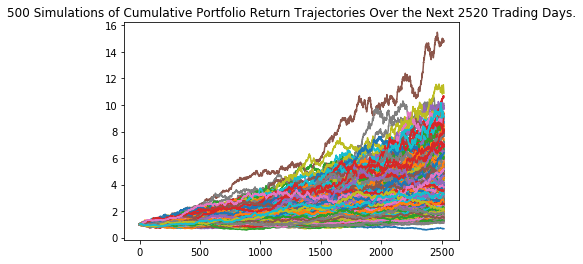

In [72]:
# Plot simulation outcomes
MC_10year.plot_simulation()

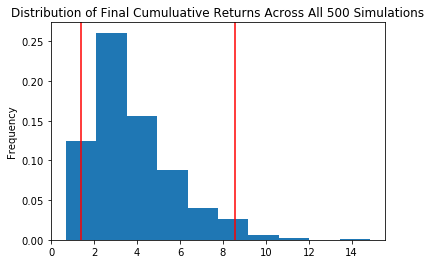

In [73]:
# Plot probability distribution and confidence intervals
MC_10year.plot_distribution()

In [74]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_10year = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_10year)

count           500.000000
mean              3.786732
std               1.934287
min               0.671400
25%               2.372453
50%               3.303321
75%               4.754841
max              14.859986
95% CI Lower      1.357572
95% CI Upper      8.573328
Name: 2520, dtype: float64


In [75]:
# Set initial investment
initial_investment_4 = 55000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_4 = round(summary_statistics_10year[8]*initial_investment_4,2)
ci_upper_4 = round(summary_statistics_10year[9]*initial_investment_4,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_4} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_4} and ${ci_upper_4}")

There is a 95% chance that an initial investment of $55000 in the portfolio over the next 10 years will end within in the range of $74666.43 and $471533.02
